#From "Diagnosing Pneumonia from X-Ray Images Using Convolutional Neural Network"

###https://towardsdatascience.com/diagnosing-pneumonia-from-x-ray-images-using-convolutional-neural-network-fe9975cab808

In [2]:

import os

base_dir = 'chest_xray/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_NORMAL_dir = os.path.join(train_dir, 'NORMAL')
train_PNEUMONIA_dir = os.path.join(train_dir, 'PNEUMONIA')

validation_NORMAL_dir = os.path.join(validation_dir, 'NORMAL')
validation_PNEUMONIA_dir = os.path.join(validation_dir, 'PNEUMONIA')

test_NORMAL_dir = os.path.join(test_dir, 'NORMAL')
test_PNEUMONIA_dir = os.path.join(test_dir, 'PNEUMONIA')

train_NORMAL_fnames = os.listdir(train_NORMAL_dir)
train_PNEUMONIA_fnames = os.listdir(train_PNEUMONIA_dir)

validation_NORMAL_fnames = os.listdir(validation_NORMAL_dir)
validation_PNEUMONIA_fnames = os.listdir(validation_PNEUMONIA_dir)

test_NORMAL_fnames = os.listdir(test_NORMAL_dir)
test_PNEUMONIA_fnames = os.listdir(test_PNEUMONIA_dir)

n_train = len(train_NORMAL_fnames) + len(train_PNEUMONIA_fnames)
n_validation = len(validation_NORMAL_fnames) + len(validation_PNEUMONIA_fnames)
n_test = len(test_NORMAL_fnames) + len(test_PNEUMONIA_fnames)

print(n_train, n_validation, n_test)

4696 578 582


In [3]:
# import os
# import random

# base_dir = 'chest_xray/'

# dir = os.path.join(base_dir, 'all_data')

# NORMAL_dir = os.path.join(dir, 'NORMAL')
# PNEUMONIA_dir = os.path.join(dir, 'PNEUMONIA')

# fnames = [os.listdir(NORMAL_dir) , os.listdir(PNEUMONIA_dir) ]

# print(len(fnames[0]) + len(fnames[1]))

# train_val_test_split = [0.8, 0.8+0.1, 0.8+0.1+0.1]

# data = [[[],[]] , [[],[]] , [[],[]]] # train, val, test, with NORMAL, PNEUMONIA inside
# for type in range(2):
#     print(type)
#     for
#     r = random.random()
#     if r < train_val_test_split[0]:
#         data[0][type].append()

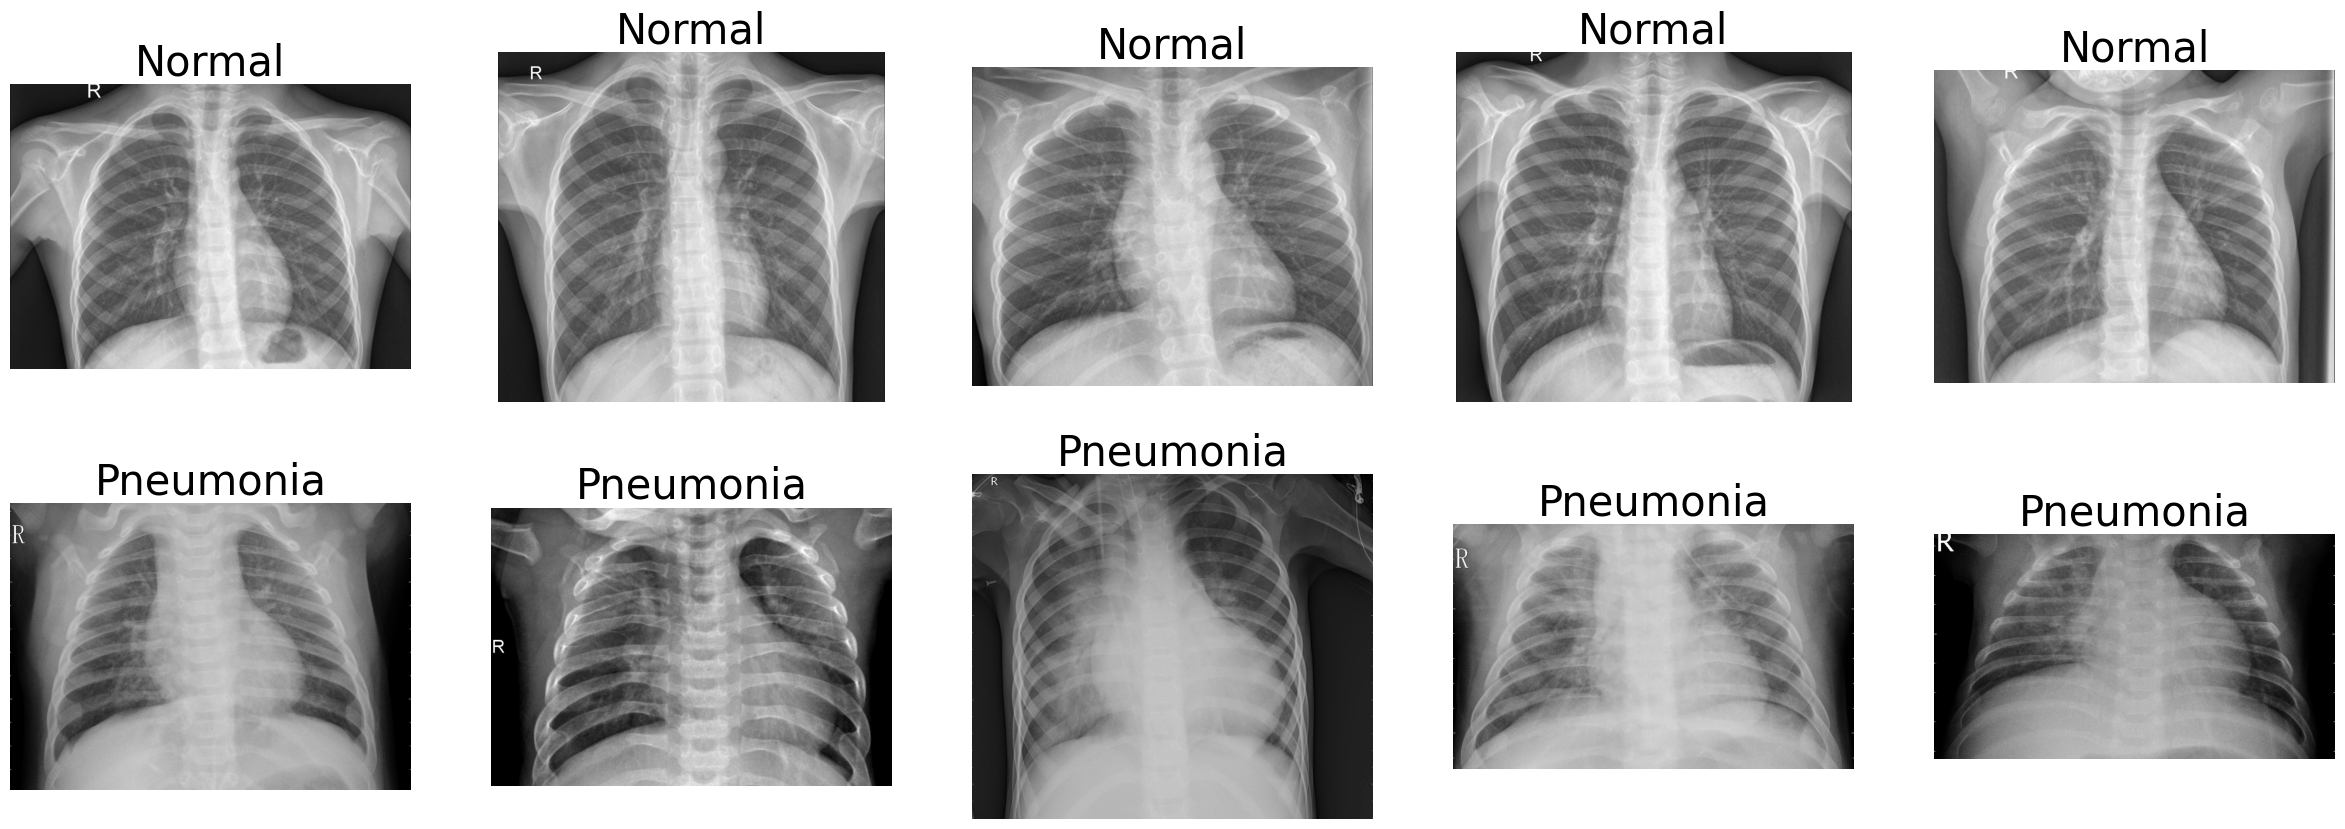

In [4]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(0,5):
    img = plt.imread(os.path.join(train_NORMAL_dir, train_NORMAL_fnames[i]))
    ax[0,i].imshow(img, cmap='gray')
    ax[0,i].axis('off')
    ax[0,i].set_title('Normal', fontsize=30)
    
for i in range(0,5):
    img = plt.imread(os.path.join(train_PNEUMONIA_dir, train_PNEUMONIA_fnames[i]))
    ax[1,i].imshow(img, cmap='gray')
    ax[1,i].axis('off')
    ax[1,i].set_title('Pneumonia', fontsize=30)
    
plt.show()

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                   samplewise_center=True,
                                   samplewise_std_normalization=True,
                                   zoom_range = 0.2, 
                                   width_shift_range=0.1,  
                                   height_shift_range=0.1)

validation_datagen  = ImageDataGenerator(rescale = 1.0/255,
                                         samplewise_center=True,
                                         samplewise_std_normalization=True, 
                                         zoom_range = 0.2, 
                                         width_shift_range=0.1,  
                                         height_shift_range=0.1)

test_datagen  = ImageDataGenerator(rescale = 1.0/255,
                                    samplewise_center=True,
                                    samplewise_std_normalization=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16,
                                                    class_mode='binary',
                                                    target_size=(160, 160))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size=16,
                                                              class_mode='binary',
                                                              target_size=(160, 160))

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  class_mode='binary',
                                                  target_size=(160, 160))

Found 4696 images belonging to 2 classes.
Found 578 images belonging to 2 classes.
Found 582 images belonging to 2 classes.


In [6]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential(name='X-ray_CNN')

model.add(tf.keras.layers.InputLayer(input_shape=(160,160,3)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

METRICS = ['accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')]
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)
history = model.fit(train_generator, 
          steps_per_epoch= n_train//16,
          validation_data=validation_generator,
          epochs=20,
          verbose=1)
model.summary()

Epoch 1/20
293/293 [==============================] - 142s 479ms/step - loss: 0.3212 - accuracy: 0.8741 - precision: 0.9027 - recall: 0.9269 - val_loss: 0.5535 - val_accuracy: 0.7612 - val_precision: 0.7588 - val_recall: 0.9977
Epoch 2/20
293/293 [==============================] - 136s 465ms/step - loss: 0.2085 - accuracy: 0.9160 - precision: 0.9347 - recall: 0.9509 - val_loss: 0.2154 - val_accuracy: 0.8997 - val_precision: 0.8912 - val_recall: 0.9861
Epoch 3/20
293/293 [==============================] - 136s 462ms/step - loss: 0.1826 - accuracy: 0.9265 - precision: 0.9440 - recall: 0.9556 - val_loss: 0.2359 - val_accuracy: 0.9014 - val_precision: 0.8882 - val_recall: 0.9931
Epoch 4/20
293/293 [==============================] - 138s 472ms/step - loss: 0.1740 - accuracy: 0.9312 - precision: 0.9501 - recall: 0.9557 - val_loss: 0.1653 - val_accuracy: 0.9446 - val_precision: 0.9902 - val_recall: 0.9352
Epoch 5/20
293/293 [==============================] - 140s 476ms/step - loss: 0.1657 - a

In [7]:
model.save('second_model')

INFO:tensorflow:Assets written to: second_model\assets


INFO:tensorflow:Assets written to: second_model\assets
